In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore' )
import scipy.stats as stat
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm

In [3]:
dataset=pd.read_csv("50_Startups.csv")
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
dataset.shape

(50, 5)

In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [7]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


In [9]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
c=dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Correlation matrix

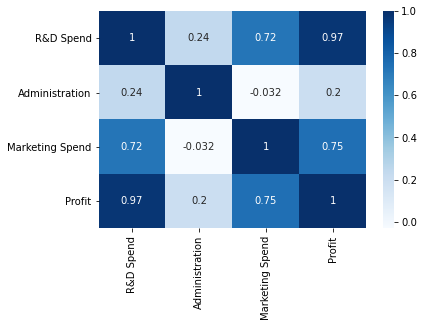

In [13]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

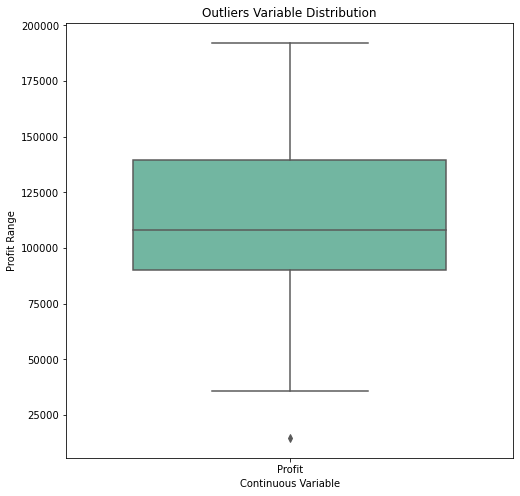

In [14]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

While looking at the boxplot we can see the outliers in the profit(target variable), but the amount of data is not much (just 50 entries) so it won’t create much negative impact.

State-wise outlier detection

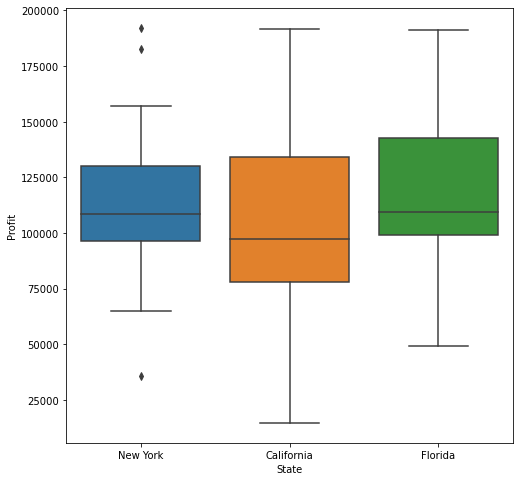

In [15]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

1. All outliers presented are in New York.
2. The startups located in California we can see the maximum profits and maximum loss.

Histogram on Profit

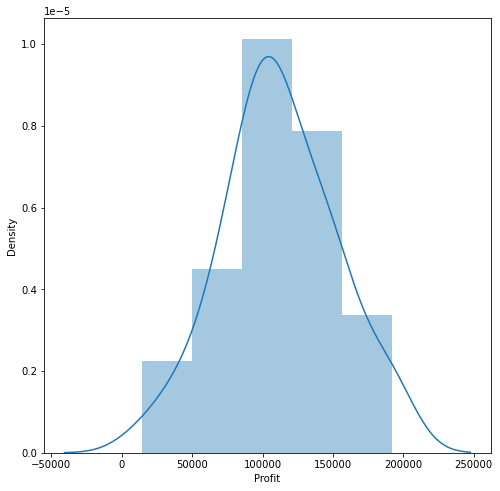

In [20]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

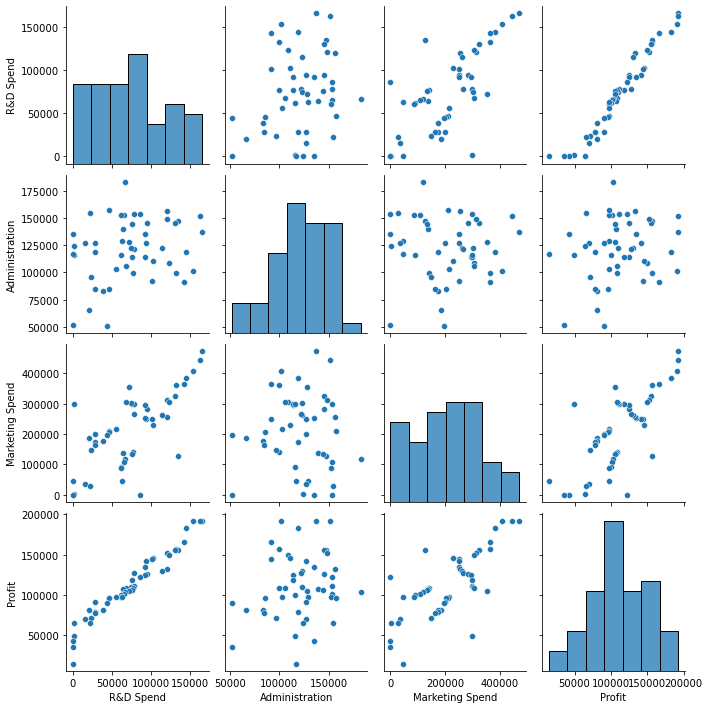

In [17]:
sns.pairplot(dataset)
plt.show()

1. As we can see in the pair pot, Research and development are directly proportional to the investment that we can do.
2. The marketing spend seems to be directly proportional (though a little bit outliers are there) with the profit.
3. There is no relationship between the second column and profit i.e. our target column.

Model Development

In [21]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

Label Encoder


In [23]:
#Label Encoder: Encode labels with values between 0 and n_classes-1.

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()


,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [54]:
dataset = dataset.rename({"R&D Spend":'RnD',"Administration":'Admin',"Marketing Spend":'Marketing'},axis = 1)
dataset.head(10)

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [56]:
model = smf.ols("Profit~RnD+Admin+Marketing",data =dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        10:20:39   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Finding rsquared values
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

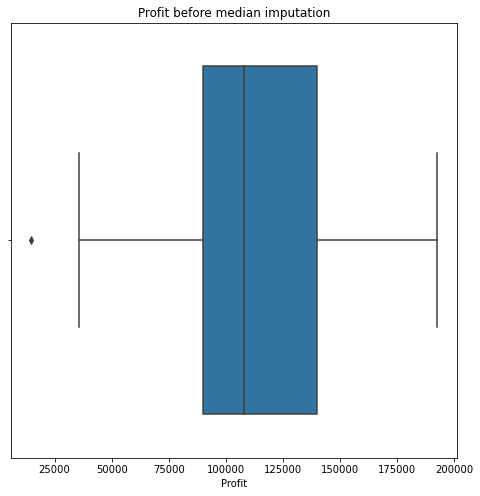

In [62]:
df = dataset.copy()
sns.boxplot(df['Profit'])
plt.title('Profit before median imputation')
plt.show()

Let's test our data in model and compare the R-squared with Median imputation data model

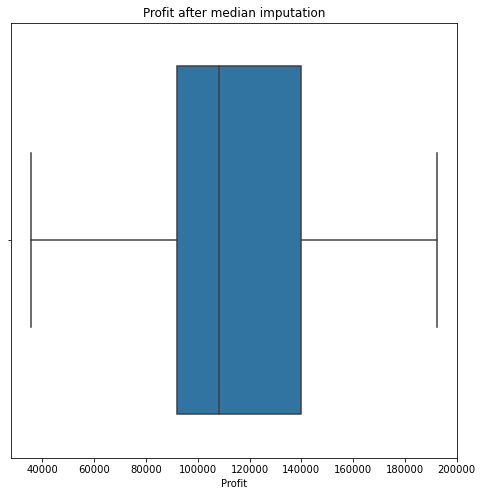

In [64]:
for i in df['Profit']:
    q1 = np.quantile(df.Profit,0.25)
    q3 = np.quantile(df.Profit,0.75)
    med = np.median(df.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df['Profit'] = df['Profit'].replace(i, np.median(df['Profit']))
sns.boxplot(df['Profit'])
plt.title('Profit after median imputation')
plt.show()

Let's test our data in model and compare the R-squared with Median imputation data model

In [65]:
model_after_median_imputation = smf.ols("Profit~RnD+Admin+Marketing", data = dataset).fit()
# Finding rsquared values
model_after_median_imputation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        10:28:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation: As you can see after median imputation the model is not performing well
Now we have to try something else to get out better results
Let's try Mean Imputation to handle Outliers in Profit

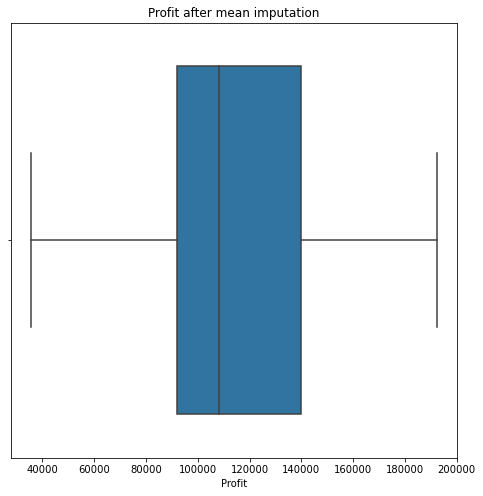

In [66]:
df1 = df.copy()
for i in df1['Profit']:
    q1 = np.quantile(df1.Profit,0.25)
    q3 = np.quantile(df1.Profit,0.75)
    med = np.median(df1.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Profit'] = df1['Profit'].replace(i, np.mean(df1['Profit']))
sns.boxplot(df1['Profit'])
plt.title('Profit after mean imputation')
plt.show()


Let's test our data in model and compare the R-squared with Mean imputation data model

In [68]:
model_after_mean_imputation = smf.ols("Profit~RnD+Admin+Marketing", data = df1).fit()
# Finding rsquared values
model_after_mean_imputation.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           5.06e-25
Time:                        10:30:11   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RnD            0.7472      0.055     13.707      0.000       0.638       0.857
Admin         -0.0149      0.062     -0.242      0.810      -0.139       0.109
Marketing      0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you can see after mean imputation the model is not performing well it got a little worse than the median one
Now we have to try something else to get out better results than the raw data


The best thing we can do is now to remove the outlier and see the results

In [69]:
data2 = dataset.copy()
data2.drop([49], inplace = True)
data2

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Since our Outlier was at 49th row , we will drop that row

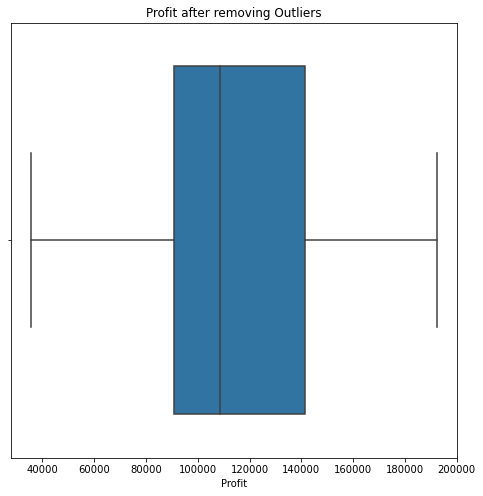

In [70]:
sns.boxplot(data2.Profit)
plt.title('Profit after removing Outliers')
plt.show()

Let's test our data in model and compare the R-squared with and without imputation data models

In [71]:
model_after_removing_outlier = smf.ols("Profit~RnD+Admin+Marketing", data = data2).fit()
# Finding rsquared values
model_after_removing_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        10:36:33   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

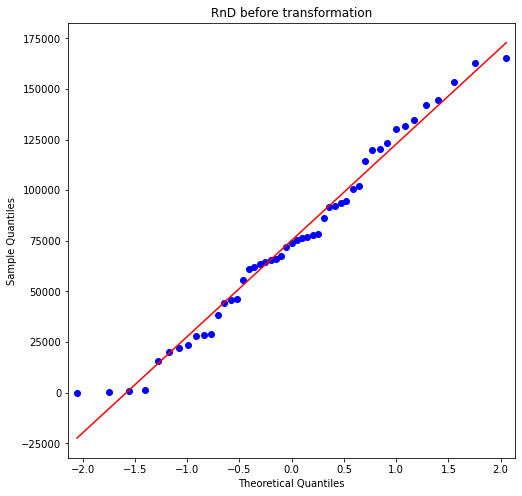

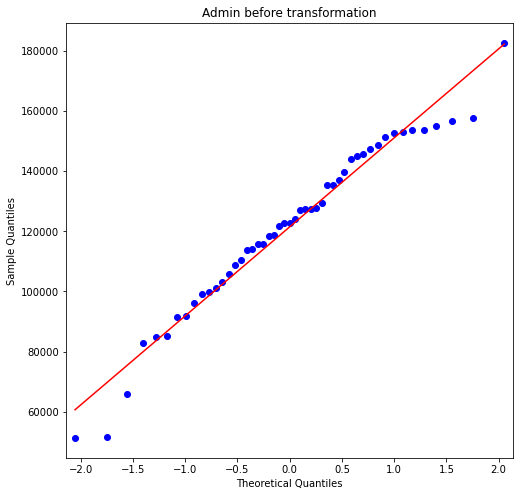

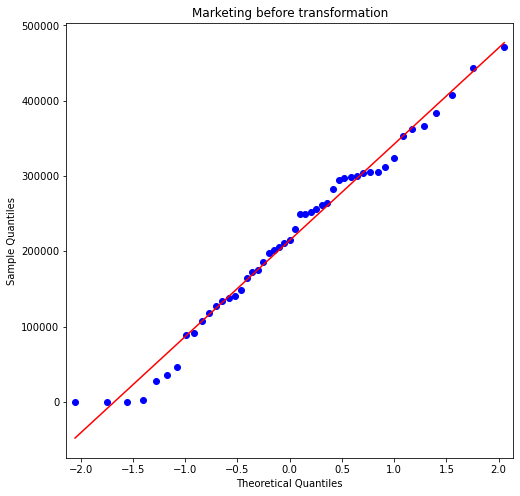

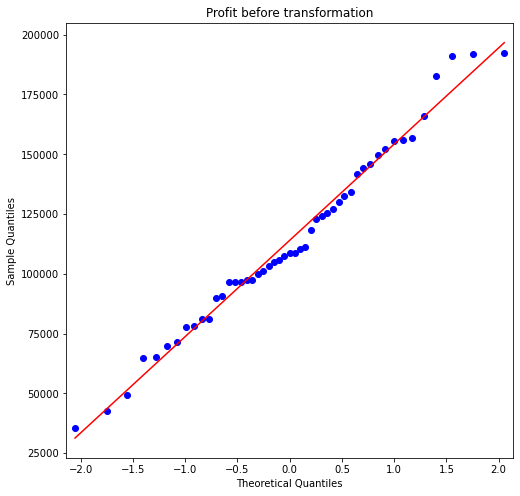

In [73]:
import statsmodels.api as smf
smf.qqplot(data2['RnD'], line ='r')
plt.title('RnD before transformation')
smf.qqplot(data2['Admin'], line ='r')
plt.title('Admin before transformation')
smf.qqplot(data2['Marketing'], line ='r')
plt.title('Marketing before transformation')
smf.qqplot(data2['Profit'], line ='r')
plt.title('Profit before transformation')
plt.show()

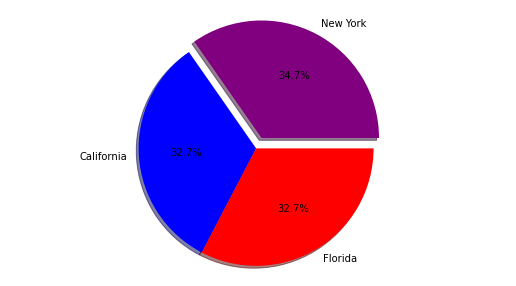

In [78]:
plt.figure(figsize = (9,5))
labels = ['New York','California','Florida']
colors = ['purple','blue','red']
explode = (0.1,0,0)
plt.pie(x = data2['State'].value_counts(),labels = labels, explode = explode, colors = colors, autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

New York has occured the most than the others in the State Feature

In [93]:
data2.State.value_counts()

New York      17
Florida       16
California    16
Name: State, dtype: int64

 The Categorical State Feature has balanced data all the unique values are approximately equally distributed

Visualizing the Relation between each Independent Feature with respect to the Dependent Feature

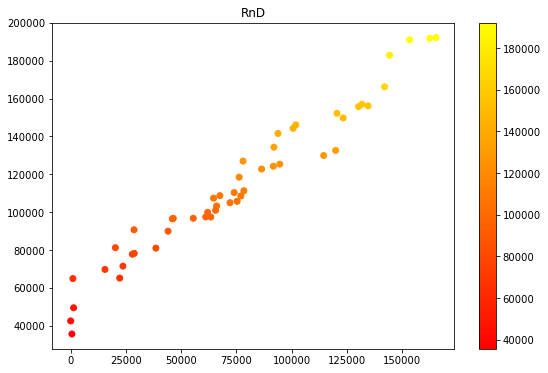

In [80]:
plt.figure(figsize = (9,6))
plt.scatter(x = data2['RnD'], y = data2['Profit'], c = data2['Profit'],cmap = 'autumn')
plt.title('RnD')
plt.colorbar()
plt.show()

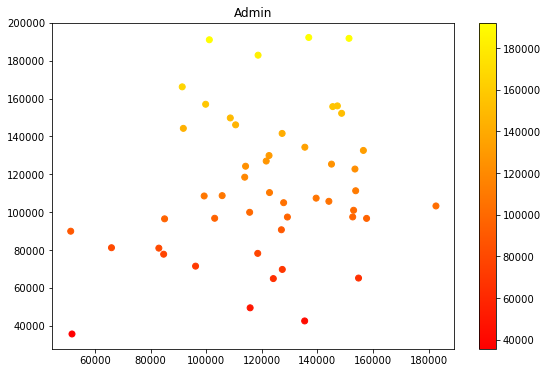

In [81]:
plt.figure(figsize = (9,6))
plt.scatter(x = data2['Admin'], y = data2['Profit'], c = data2['Profit'],cmap = 'autumn')
plt.title('Admin')
plt.colorbar()
plt.show()

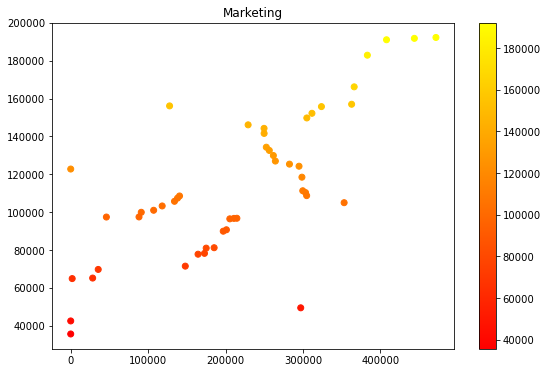

In [82]:
plt.figure(figsize = (9,6))
plt.scatter(x = data2['Marketing'], y = data2['Profit'], c = data2['Profit'],cmap = 'autumn')
plt.title('Marketing')
plt.colorbar()
plt.show()

 RnD feature has a good linear relation with Profit as compare to other features

In [88]:
x = "State"
y = "Profit"

<AxesSubplot:xlabel='State', ylabel='Profit'>

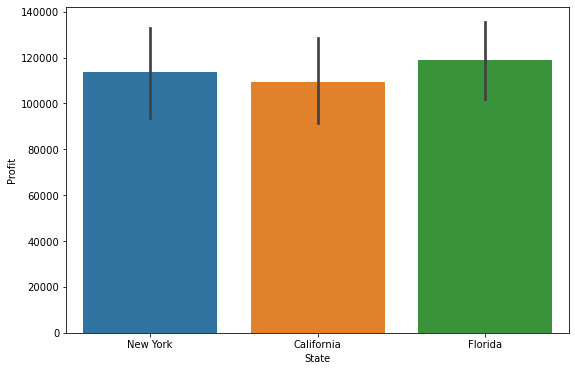

In [97]:
plt.figure(figsize =(9,6))
sns.barplot(x = "State", y = "Profit", data = data2)


Observation:There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation



We are going to drop this feature while building model as it is an irrelevant feature for our inferences

In [99]:
data3 = data2.copy()
data3 = data3.drop('State', axis = 1)
data3.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [100]:
data3.corr()

,RnD,Admin,Marketing,Profit
RnD,1.000000,0.243438,0.711654,0.978437
Admin,0.243438,1.000000,-0.037280,0.205841
Marketing,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


Feature Engineering

Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores
Applying Standard Scaler

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data3.values)
scaled_features_df = pd.DataFrame(scaled_features, index = data3.index, columns = data3.columns)
scaled_features_df.head()

,RnD,Admin,Marketing,Profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [103]:
print(np.round(scaled_features_df.mean(),1),'\n',(np.round(scaled_features_df.std(),1)))

RnD          0.0
Admin       -0.0
Marketing   -0.0
Profit      -0.0
dtype: float64 
 RnD          1.0
Admin        1.0
Marketing    1.0
Profit       1.0
dtype: float64


In [105]:
model = smf.ols("Profit~RnD+Admin+Marketing", data = scaled_features_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        10:51:24   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.029  -5.21e-15      1.000      -0.059       0.059
RnD            0.9254      0.045     20.470      0.000       0.834       1.017
Admin         -0.0165      0.032     -0.518      0.607      -0.080       0.048
Marketing      0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Testing



As ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)

In [106]:
# Getting Coefficient Parameters
model.params

Intercept   -1.526557e-16
RnD          9.254411e-01
Admin       -1.646059e-02
Marketing    8.009988e-02
dtype: float64

Assupmtion for multi linear Regression fails

Feature should be independent of each other, there should'nt be any dependency upon each other

In [107]:
#Getting tvalues and pvalues
display(np.round(model.tvalues,3), np.round(model.pvalues,3))

Intercept    -0.000
RnD          20.470
Admin        -0.518
Marketing     1.825
dtype: float64

Intercept    1.000
RnD          0.000
Admin        0.607
Marketing    0.075
dtype: float64

Let's first compare models by their R-Squared and p_values.

In [108]:
model_admin = smf.ols("Profit~Admin", data = scaled_features_df).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Wed, 29 Mar 2023   Prob (F-statistic):              0.156
Time:                        10:53:19   Log-Likelihood:                -68.467
No. Observations:                  49   AIC:                             140.9
Df Residuals:                      47   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.665e-16      0.143  -1.17e-15      1.000      -0.287       0.287
Admin          0.2058      0.143      1.442      0.156      -0.081       0.493
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
display(np.round(model_admin.tvalues,3), np.round(model_admin.pvalues,3))

Intercept   -0.000
Admin        1.442
dtype: float64

Intercept    1.000
Admin        0.156
dtype: float64

In [111]:
model_marketing = smf.ols("Profit~Marketing", data = scaled_features_df).fit()
model_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.30e-09
Time:                        10:53:51   Log-Likelihood:                -50.150
No. Observations:                  49   AIC:                             104.3
Df Residuals:                      47   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.665e-16      0.098   -1.7e-15      1.000      -0.198       0.198
Marketing      0.7393      0.098      7.527      0.000       0.542       0.937
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
display(np.round(model_marketing.tvalues,3), np.round(model_marketing.pvalues,3))

Intercept   -0.000
Marketing    7.527
dtype: float64

Intercept    1.0
Marketing    0.0
dtype: float64

In [114]:
model_admin_plus_marketing= smf.ols('Profit~Admin+Marketing', data =scaled_features_df).fit()
# Finding rsquared values
model_admin_plus_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           6.59e-10
Time:                        10:54:21   Log-Likelihood:                -47.010
No. Observations:                  49   AIC:                             100.0
Df Residuals:                      46   BIC:                             105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.665e-16      0.093  -1.79e-15      1.000      -0.187       0.187
Admin          0.2337      0.093      2.508      0.016       0.046       0.421
Marketing      0.7480      0.093      8.027      0.000       0.560       0.936
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
model_admin_plus_RnD = smf.ols('Profit~RnD+Admin', data= scaled_features_df).fit()
model_admin_plus_RnD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.69e-32
Time:                        10:56:16   Log-Likelihood:                 8.4042
No. Observations:                  49   AIC:                            -10.81
Df Residuals:                      46   BIC:                            -5.133
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.665e-16      0.030  -5.54e-15      1.000      -0.060       0.060
RnD            0.9868      0.031     31.847      0.000       0.924       1.049
Admin         -0.0344      0.031     -1.110      0.273      -0.097       0.028
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

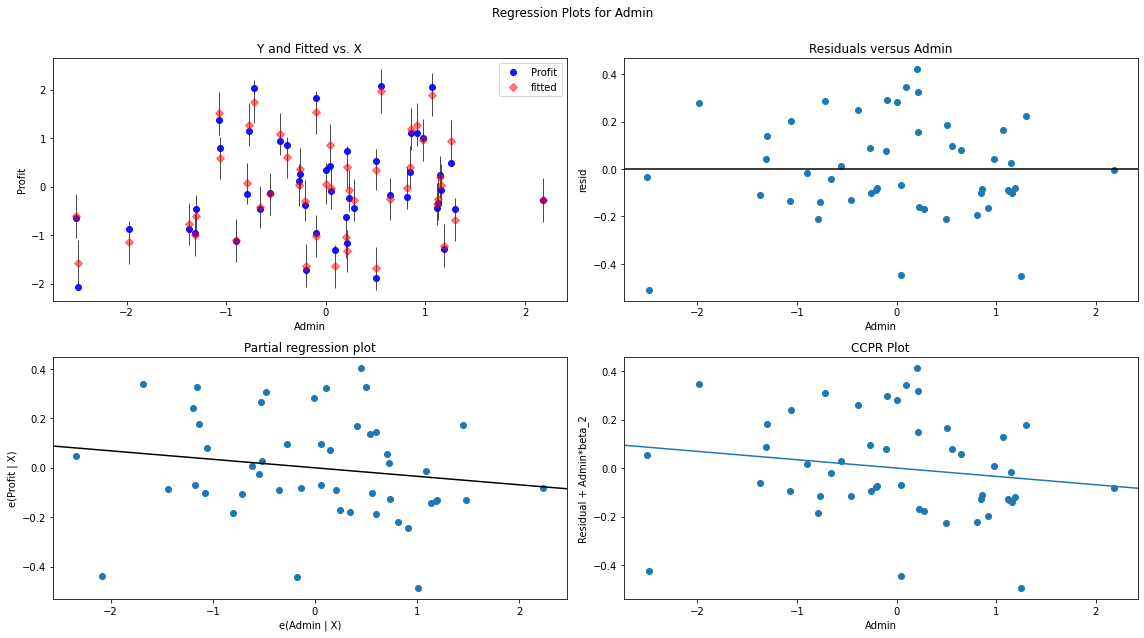

In [126]:
import statsmodels.api as sm
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_admin_plus_RnD,'Admin', fig = fig)
plt.show()

In [125]:
model_marketing_plus_RnD = sm.ols("Profit~RnD+Marketing", data = scaled_features_df).fit()
model_marketing_plus_RnD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           3.74e-33
Time:                        11:00:18   Log-Likelihood:                 10.009
No. Observations:                  49   AIC:                            -14.02
Df Residuals:                      46   BIC:                            -8.342
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.665e-16      0.029  -5.73e-15      1.000      -0.059       0.059
RnD            0.9164      0.041     22.136      0.000       0.833       1.000
Marketing      0.0871      0.041      2.104      0.041       0.004       0.170
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

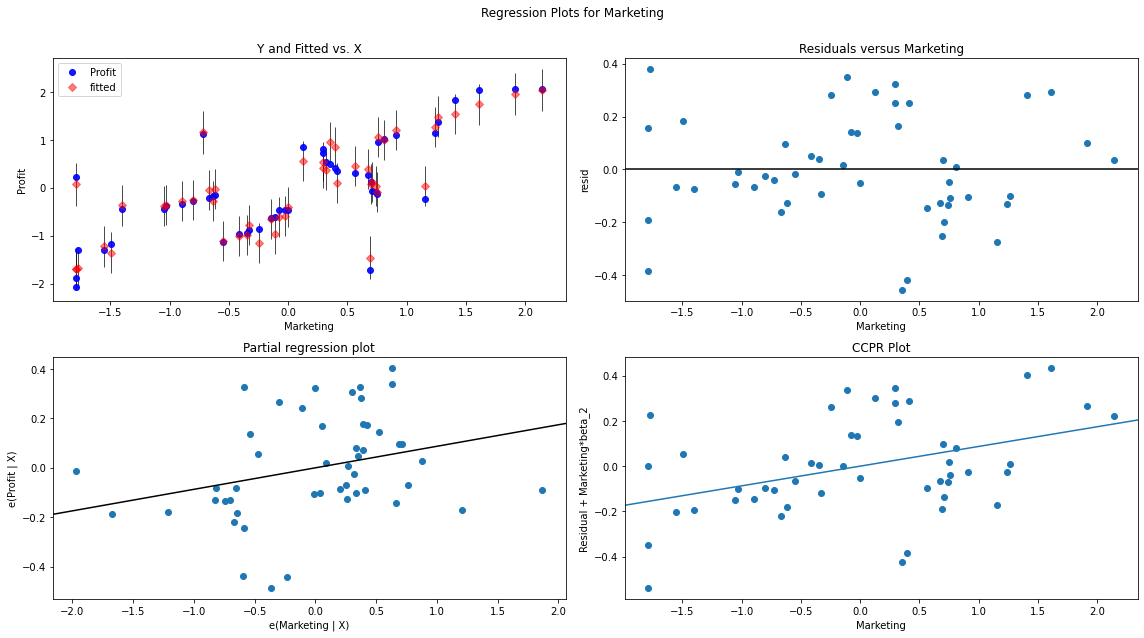

In [128]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_marketing_plus_RnD,'Marketing', fig = fig)
plt.show()

In [131]:
model_only_RnD = smf.ols("Profit~RnD", data = scaled_features_df).fit()
model_only_RnD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           7.56e-34
Time:                        11:02:20   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.665e-16      0.030  -5.53e-15      1.000      -0.061       0.061
RnD            0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's compare the residuals of both the models to come up with an conclusion


Model Validation

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [133]:
data3.columns

Index(['RnD', 'Admin', 'Marketing', 'Profit'], dtype='object')

In [134]:
x = data3.drop('Profit', axis = 1).values
y = data3.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 3)
Shape of y: (49, 1)


In [135]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 3)
Shape of X_test:  (13, 3)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [136]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train) 
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [138]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)



In [139]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

In [140]:
# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

In [141]:
# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9059814869956571
R2_score (train):  0.9650197585709105
R2_score (test):  0.9341582772336136
RMSE using all features:  8385.78357148079


Using RnD and Marketing Feature

In [142]:
x = data3.drop(['Profit','Admin'],axis=1).values
y = data3.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 2)
Shape of y: (49, 1)


In [143]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 2)
Shape of X_test:  (13, 2)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [144]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train) 
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [145]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)


In [146]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_rnd_and_marketing_train = r2_score(y_train_scal, y_pred_linear_train)

In [147]:
# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_rnd_and_marketing_test = r2_score(y_test_scal, y_pred_linear_test)

In [148]:
# Predicting RMSE the Test set results
rmse_linear_using_RnD_and_marketing = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_and_marketing_train)
print('R2_score (test): ', r2_score_rnd_and_marketing_test)
print("RMSE using RnD and Marketing feature: ", rmse_linear_using_RnD_and_marketing)

CV:  0.9114070932851247
R2_score (train):  0.9643536571553787
R2_score (test):  0.939185037123506
RMSE using RnD and Marketing feature:  8059.31776528276


Using only RnD feature

In [149]:
x = data3.iloc[:,:1].values
y = data3.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 1)
Shape of y: (49, 1)


In [150]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 1)
Shape of X_test:  (13, 1)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [151]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train) 
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear_using_rnd = LinearRegression()
regressor_linear_using_rnd.fit(x_train_scal, y_train_scal)

LinearRegression()

In [152]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [153]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear_using_rnd, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear_using_rnd.predict(x_train_scal)
r2_score_rnd_train = r2_score(y_train_scal, y_pred_linear_train)

In [154]:
# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear_using_rnd.predict(x_test_scal)
r2_score_rnd_test = r2_score(y_test_scal, y_pred_linear_test)

In [155]:
# Predicting RMSE on Test set results
rmse_linear_using_only_RnD = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_train)
print('R2_score (test): ', r2_score_rnd_test)
print("RMSE using only RnD feature: ", rmse_linear_using_only_RnD)

CV:  0.8900789292733178
R2_score (train):  0.957733077239081
R2_score (test):  0.9521017609333128
RMSE using only RnD feature:  7152.417057875892


Let's compare the Root Mean Squared Error and check for the minimum value

In [158]:
final_model = smf.ols("Profit~RnD", data = scaled_features_df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           7.56e-34
Time:                        11:08:34   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.665e-16      0.030  -5.53e-15      1.000      -0.061       0.061
RnD            0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

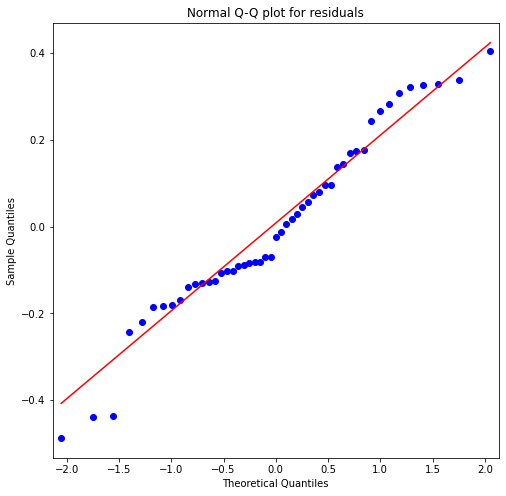

In [160]:
sm.qqplot(final_model.resid, line = 'q')
plt.title("Normal Q-Q plot for residuals")
plt.show()


Residual plot for Homoscedasticity

In [161]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

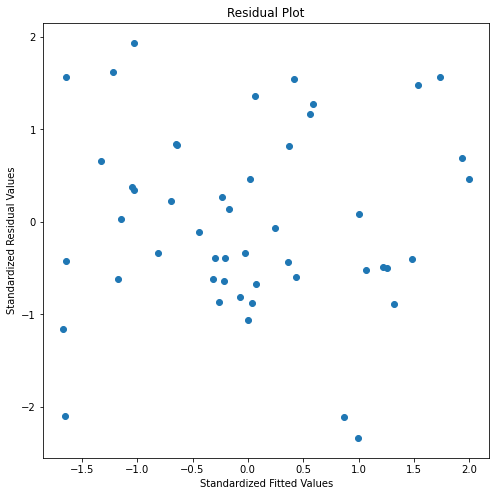

In [162]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Residual VS Regressors

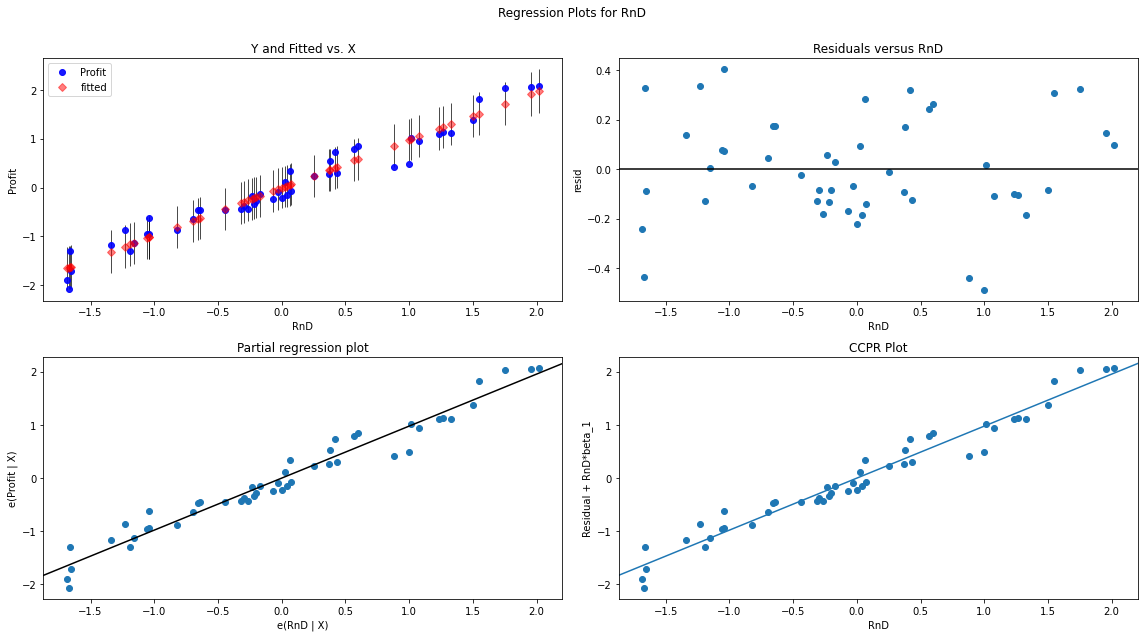

In [164]:
fig = plt.figure(figsize = (16,9))
plot_RnD = sm.graphics.plot_regress_exog(final_model,'RnD', fig=fig)
plt.show()

Predicting values from Model using same dataset

In [165]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(data3.values.reshape(-1,1))

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [166]:
predicted = pd.DataFrame(prediction_unscaled, columns=['Predicted_Profit'])
predicted['Profit'] = data3.Profit
predicted['RnD'] = data3.RnD
predicted

,Predicted_Profit,Profit,RnD
0,188741.633166,192261.83,165349.20
1,165165.693431,191792.06,162597.70
2,442665.543246,191050.39,153441.51
3,211042.488062,182901.99,144372.41
4,186461.632949,166187.94,142107.34
...,...,...,...
191,86993.489143,NaN,NaN
192,52176.000671,NaN,NaN
193,94603.229137,NaN,NaN
194,51726.836899,NaN,NaN


Table containing R^2 value for each prepared model

In [167]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Using All Features Model','Using RnD and Marketing Feature Model','Using only R&D Feauture Model'],
        'R_squared':[model.rsquared,model_after_median_imputation.rsquared,model_after_mean_imputation.rsquared,model_after_removing_outlier.rsquared,r2_score_all_feature_train,r2_score_rnd_and_marketing_train,r2_score_rnd_train],
        'R_squared_adjusted':[model.rsquared_adj,model_after_median_imputation.rsquared_adj,model_after_mean_imputation.rsquared_adj,model_after_removing_outlier.rsquared_adj,model.rsquared_adj,model_marketing.rsquared_adj,model_only_RnD.rsquared_adj],
       'RMSE':[np.sqrt(model.mse_resid),np.sqrt(model_after_median_imputation.mse_resid),np.sqrt(model_after_mean_imputation.mse_resid),np.sqrt(model_after_removing_outlier.mse_resid),rmse_linear_using_all_features,rmse_linear_using_RnD_and_marketing,rmse_linear_using_only_RnD]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.961316,0.958737,0.205237
1,Median_Imputation_Outlier,0.950746,0.947534,9232.334837
2,Mean_Imputation_outlier,0.918296,0.912967,11148.345424
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Using All Features Model,0.965020,0.958737,8385.783571
5,Using RnD and Marketing Feature Model,0.964354,0.536927,8059.317765
6,Using only R&D Feauture Model,0.957733,0.956432,7152.417058


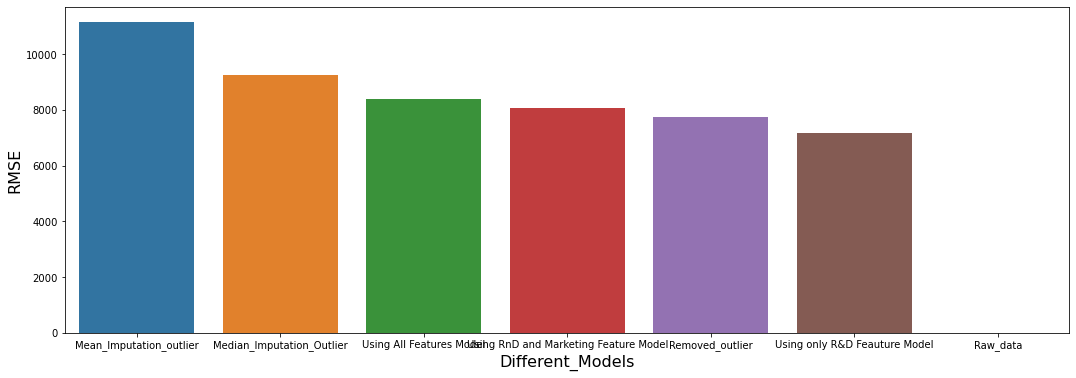

In [168]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()